# 1. 형태소 분석기 사용

## 1) Konlpy - Okt 형태소 분석기

In [5]:
from konlpy.tag import Okt

okt = Okt()
sentens = "무궁화꽃이 피었습니다."
result = okt.pos(sentens)
print(result)

[('무궁화', 'Noun'), ('꽃', 'Noun'), ('이', 'Josa'), ('피었습니다', 'Verb'), ('.', 'Punctuation')]


## 2) Kiwipiepy - Kiwi 형태소 분석기

In [9]:
import pandas as pd
from kiwipiepy import Kiwi
kiwi = Kiwi()
kiwi.tokenize("안녕하세요 형태소 분석기 키위입니다.")

[Token(form='안녕', tag='NNG', start=0, len=2),
 Token(form='하', tag='XSA', start=2, len=1),
 Token(form='세요', tag='EF', start=3, len=2),
 Token(form='형태소', tag='NNG', start=6, len=3),
 Token(form='분석기', tag='NNG', start=10, len=3),
 Token(form='키위', tag='NNG', start=14, len=2),
 Token(form='이', tag='VCP', start=16, len=1),
 Token(form='ᆸ니다', tag='EF', start=16, len=3),
 Token(form='.', tag='SF', start=19, len=1)]

In [7]:
from konlpy.tag import Kkma

kkma = Kkma()
sentence = "무궁화꽃이 피었습니다."
result = kkma.pos(sentens)
print(result)

[('무궁화', 'NNG'), ('꽃', 'NNG'), ('이', 'JKS'), ('피', 'VV'), ('었', 'EPT'), ('습니다', 'EFN'), ('.', 'SF')]


In [18]:
kiwi.tokenize("지이인짜 귀여워요")

[Token(form='지', tag='NNB', start=0, len=1),
 Token(form='이', tag='NR', start=1, len=1),
 Token(form='인', tag='NNG', start=2, len=1),
 Token(form='짜', tag='NNG', start=3, len=1),
 Token(form='귀엽', tag='VA-I', start=5, len=3),
 Token(form='어요', tag='EF', start=7, len=2)]

In [12]:
df = pd.read_csv("./data/appreply.csv")

In [ ]:
df.head()
df.reset_index(drop=True) # 인덱스 삭제

,Unnamed: 0,text,score
0,0,NaN,4
1,1,NaN,5
2,2,NaN,1
3,3,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4
4,4,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5


In [13]:
df = df.drop(df.columns[0],axis=1) # 첫번째열 제거

In [15]:
df.head()

,text,score
0,NaN,4
1,NaN,5
2,NaN,1
3,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4
4,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5


In [17]:
## 해결해보기 : 결측치 없애고 싶어요
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   text    1000 non-null   str  
 1   score   1003 non-null   int64
dtypes: int64(1), str(1)
memory usage: 15.8 KB


## 데이터 전처리

In [ ]:
## 결측치 삭제 : df.dropna()
## 인덱스 초기화 : reset_index()

df2 = df.dropna().reset_index(drop=True)
df2

,text,score
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3
...,...,...
995,갑자기 로그아웃 되더니 비밀번호 변경 실패 메세지가 계속 뜨네요. 휴대폰 번호로 인...,1
996,기사님이 상품 픽업을 하셨는지 표시되면 더 좋을 것 같습니다. 가게에서 조리가 늦게...,3
997,요즘 요기요 보다 배민을 많이 쓰는 사람입니다 전화보다 앱을 써서 좀더 간편하고 다...,3
998,취소 됐으면 적어도 전화 주는 제도는 있어야하는거 아닌가요? 주문해놓고 다른거 하는...,1


In [116]:
df.to_csv("./data/appreply_결측치삭제.csv")

NameError: name 'df' is not defined

In [11]:
df2 = pd.read_csv("./data/appreply_결측치삭제.csv",index_col=0)

df2.head()

,text,score
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3


## 데이터 탐색

In [12]:
## score별로 리뷰가 몇개씩 있나요?
score_sum = df2["score"].value_counts().sort_index()
# score = df2.groupby("score")["text"].count()
# print(score)

In [13]:

df2["score"].unique()

array([4, 5, 1, 2, 3])

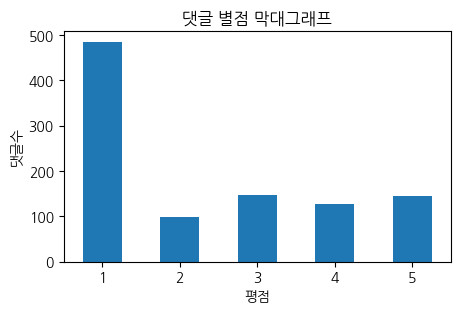

In [40]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.figure(figsize=(5,3))
score_sum.plot(kind="bar")
plt.title("댓글 별점 막대그래프")
plt.xlabel("평점")
plt.ylabel("댓글수")
plt.xticks(rotation=0)
plt.show()

In [15]:
## 새로운 변수 reaction을 만들고 싶어요. (np.where) score가 3보다 크면 긍정,아니면 부정
import numpy as np

df2["reaction"] = np.where(df2["score"]>3 ,"긍정","부정")
df2.head()

,text,score,reaction
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4,긍정
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5,긍정
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1,부정
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2,부정
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3,부정
...,...,...,...
995,갑자기 로그아웃 되더니 비밀번호 변경 실패 메세지가 계속 뜨네요. 휴대폰 번호로 인...,1,부정
996,기사님이 상품 픽업을 하셨는지 표시되면 더 좋을 것 같습니다. 가게에서 조리가 늦게...,3,부정
997,요즘 요기요 보다 배민을 많이 쓰는 사람입니다 전화보다 앱을 써서 좀더 간편하고 다...,3,부정
998,취소 됐으면 적어도 전화 주는 제도는 있어야하는거 아닌가요? 주문해놓고 다른거 하는...,1,부정


Text(0.5, 1.0, '리뷰 평가')

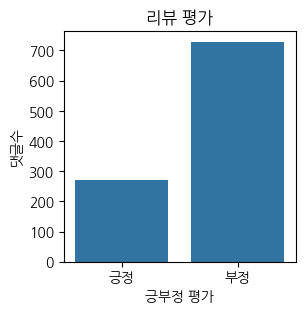

In [38]:
import seaborn as sns

reaction_sum = df2["reaction"].value_counts()

reaction_sum = reaction_sum.sort_index()

plt.figure(figsize=(3,3))
sns.barplot(data=reaction_sum)
plt.ylabel("댓글수")
plt.xlabel("긍부정 평가")
plt.title("리뷰 평가")

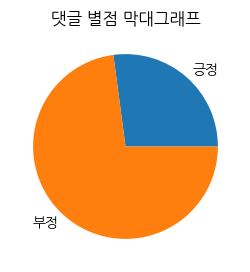

In [60]:
plt.figure(figsize=(3,3))
reaction_sum.plot(kind="pie")
plt.title("댓글 별점 막대그래프")
plt.xticks(rotation=0)
plt.show()

## (2) 새로운 긍부정 열 만들기

In [ ]:
## 새로운 변수를 만들고 싶어요 (apply)
df2["reaction"] = df2["score"].apply(lambda x : "긍정" if x > 3 else "부정" )

## (3) 새로운 length 열 만들기

In [ ]:
## 텍스트 길이를 알고 싶어요
## 방법 1. text의 길이가 궁금합니다.(df.str.len())
## 방법 2. text의 길이가 궁금합니다.(apply())

df2["textlen2"] = df2["text"].str.len()

In [43]:
## 방법 2. text의 길이가 궁금합니다.(apply())
df2["textlen"] = df2["text"].apply(lambda x : len(x))
df2.head()

,text,score,reaction,textlen,textlen2
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4,긍정,227,227
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5,긍정,175,175
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1,부정,229,229
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2,부정,196,196
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3,부정,250,250


In [ ]:
df2 = df2.drop("textlen2",axis=1)

In [57]:
df2.sort_values(by=["textlen"],ascending=False).head()

,text,score,reaction,textlen
603,배달팁이 기본 4000원이 넘어갑니다 장난하나요? 7000원인 곳도 있어요 물가 올...,1,부정,500
491,참답답하네요.버그부터 고치셔야죠 화면이 잘려 나온다니까요. 오류코드라도 나와줘야 저...,1,부정,500
971,고객은 바보가 아닙니다. 당연히 본인인증 다 거치고 첫주문했죠. '첫주문' 이니까 ...,1,부정,500
12,"지역에 따른 배달팁 가격이 거리에 따라서 다른 건 이해를 하는데, 그 책정방법에 불...",3,부정,500
42,업데이트에 불만이 있습니다. 기존 버전에선 배민오더로 주문할 시 지도를 이용해 주문...,1,부정,499


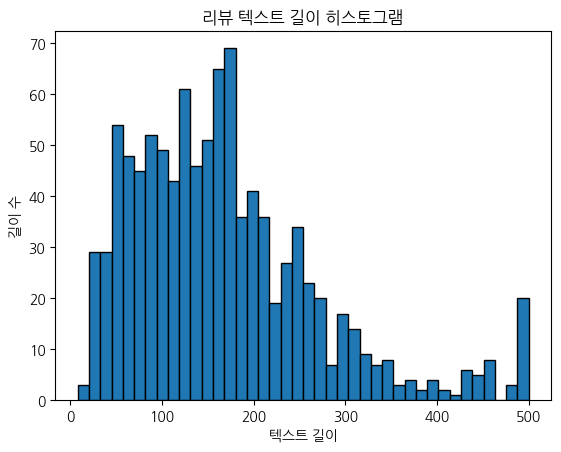

In [59]:
plt.hist(df2["textlen"],bins=40,edgecolor="black")
plt.xlabel("텍스트 길이")
plt.ylabel("길이 수")
plt.title("리뷰 텍스트 길이 히스토그램")
plt.show()



In [36]:
max_len= df2["textlen"].max()
min_len = df2["textlen"].min()
print(f"리뷰의 최대 길이는 {max_len}자 이고, 최소 길이는 {min_len} 입니다")

리뷰의 최대 길이는 500자 이고, 최소 길이는 8 입니다


## (4) 워드클라우드

#### 정규표현식

In [71]:
import re

text = "오늘!!!!! ㄴㄴㄴㄴㄴ 너무 ㅓㅑㅣㅇ 추워어어 very cold VERY COLD 010-0000-0000 ^^ ㅎㅎㅇㅇ"

# re.sub(패턴,대체할 값,대상) : 대상에서 "패턴"을 파악한 후 , 그값을 "대체할"값으로 바꾼다.
# 패턴:"[^0-9a-zA-Zㄱ-ㅎ하ㅏ-ㅣ가-힣\s]" : 숫자,영어 소문자,영어 대문자,자음,모음,한글,띄어쓰기
new_text = re.sub("[^0-9a-zA-Zㄱ-ㅎㅏㅣ가-힣\s]","",text)
new_text2 = re.sub("[^0-9a-zA-Z\s]","",text)
print(new_text2)

     very cold VERY COLD 01000000000  


In [73]:
# 목표 : 데이터 프레임을 단어 리스트로 만드는 것
# 0. 빈 리스트를 만든다. word_list , stopwords
# 1. 데이터 프레임에서 text 값을 하나씩 뽑는다 -> 문장 sent
# 2. sent에서 필요없는 문자(특수문자,이모지등)를 없앤다. [^0-9a-zA-Z가-힣\s]
# 3. 형태소 분석기를 통해 단어 리스트로 뽑는다. result
# 4. word_list에 stopwords에 없는 result 요소들을 추가한다.

In [82]:
from konlpy.tag import Okt
okt = Okt()

In [83]:
text = "안녕하세요. 파이썬입니다."
result_morphs = okt.morphs(text)
print(result_morphs)
result_pos = okt.pos(text)
print(result_pos)

['안녕하세요', '.', '파이썬', '입니다', '.']
[('안녕하세요', 'Adjective'), ('.', 'Punctuation'), ('파이썬', 'Noun'), ('입니다', 'Adjective'), ('.', 'Punctuation')]


In [113]:
word_list = []
stopwords = ["민족","배달"]

# 1. 데이터 프레임에서 text 값을 하나씩 뽑는다 -> 문장 sent
for sent in df2["text"] :
    # 2. sent에서 필요없는 문자(특수문자,이모지등)를 없앤다. [^0-9a-zA-Z가-힣\s]
    print(sent[:40])
    clean_sent = re.sub("[^0-9a-zA-Z가-힣\s]","",sent)
    print(clean_sent[:40])
    # 3. 형태소 분석기를 통해 단어 리스트로 뽑는다.(조건:Noun, 단어길이가 1보다큰것,stopwords에 없는것) result
    ## 3-1 (단어,품사) 쌍으로 결과를 출력한다.
    result = okt.pos(clean_sent)
    ## 3-2. 하나씩 뽑아서 품사가 Noun인지 확인한다.
    sub_list = []
    for res in result:
        word = res[0]
        pos = res[1]
        ## 3-3 word가 stopwords에 있으면 건너띈다
        if word in stopwords : continue

        ## 3-3. 품사가 Noun이고 단어길이가 1보다큰것만 sub_list에 담는다
        if pos=="Noun" and len(word)>1:
            sub_list.append(word)
    print(sub_list)
    # 4. word_list에 stopwords에 없는 result 요소들을 추가한다.
    word_list.extend(sub_list)
    #print(result)
    print("-"*30)
print(len(word_list))

배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다
배달의민족 주문시 리뷰를 자주 참고하는 편입니다 한가지 건의사항이 있다면
['주문', '리뷰', '자주', '참고', '편입', '한가지', '건의', '사항', '최신', '점순', '주문', '자하', '메뉴', '메뉴', '리뷰', '확인', '기능', '메뉴', '검색', '기능', '리뷰', '특정', '메뉴', '검색', '기능', '주문', '수가', '메뉴', '리뷰', '보기', '위해', '래그', '시간', '소요', '효율', '발생', '긍정', '검토', '주심']
------------------------------
내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가
내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요 분명 이 가게에
['주문', '과거', '목록', '검색', '기능', '분명', '가게', '기억', '찾기', '메뉴', '검색', '곱창', '치면', '과거', '곱창', '목록', '가게', '리뷰', '리뷰', '보기']
------------------------------
검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때,
검색 화면에서 전체배달포장 탭 중 배달 탭을 스크롤 내리면서 볼 때 아래
['검색', '화면', '전체', '포장', '크롤', '아래', '크롤', '자꾸만', '왼쪽', '오른쪽', '전체', '포장', '정말', '검색', '포장', '마트', '하나', '선택', '좌우', '가끔', '크롤', '왼쪽', '전체', '가게']
------------------------------
배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위
배달팁 낮은 순으로 정렬하면 04000원 이런식으로 된 가게가 가장 위로
['정렬', '가게', '가장', '위로', '지역', '추가', '별도', '체크', '이상', '장난', '하나', '하나', '가

#### 단어 카운팅하기ㅏ(Counter)

In [96]:
from collections import Counter

example = ["남","여","여","남","남","남","응답없음"]
counter = Counter(example)
print(counter)

Counter({'남': 4, '여': 2, '응답없음': 1})


In [100]:
# 기능 많이 발생한 순서대로 n개 추출
count_most = counter.most_common(2)
print(dict(count_most))

{'남': 4, '여': 2}


#### 워드클라우드 그리기

In [101]:
# Colab 전용
# !pip insall wordcloud

# 로컬
# uv add wordcloud

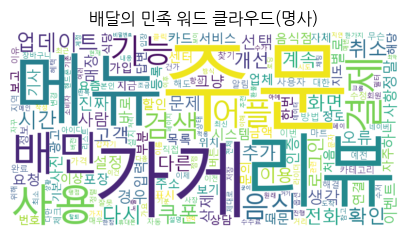

In [114]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib

word_list_cnt = Counter(word_list)
wc = WordCloud(
    font_path="C:\Windows\Fonts\malgun.ttf",
    background_color="white",
    width=800,
    height=400
)

wc.generate_from_frequencies(word_list_cnt)

plt.figure(figsize=(5,5))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("배달의 민족 워드 클라우드(명사)")
plt.show()

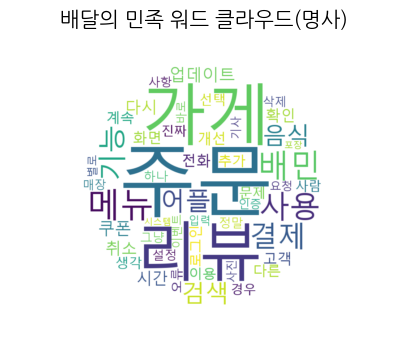

In [115]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib

from PIL import Image
import numpy as np


image = Image.open("./data/images/circle.png")
mask_img = np.array(image)

word_list_cnt = Counter(word_list)
most_word_list = word_list_cnt.most_common(50)
wc = WordCloud(
    font_path="C:\Windows\Fonts\malgun.ttf",
    background_color="white",
    mask=mask_img,
    width=800,
    height=400
)

wc.generate_from_frequencies(dict(most_word_list))

plt.figure(figsize=(5,5))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("배달의 민족 워드 클라우드(명사)",fontsize=15)
plt.show()

In [ ]:
# 무조건 많이 발생한 단어들만 의미가 있을까? -->실제 데이터를 찾아보기
# 워드클라우드만 보고 텍스트 분석을 할 수 있을까?
